In [1]:
from gausspy_pipeline import GausspyPipeline
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pickle
from astropy.io import fits

# 1. Create pipeline and initialize all parameters
pipeline = GausspyPipeline(
    cube_file='../datacubes/spw2.fits',
    v1=10, v2=1500, x1=190, x2=210, y1=220, y2=240,
    alpha1=0.1, alpha2=12.0, snr_thresh=3.0,
    stack_vrange=(-200, 200), stack_dv=0.2
)


In [4]:
# transform the fits cube to gausspy format
pipeline.prepare_input()

# d = pickle.load(open('spectrum_for_gausspy_spw1.pickle', 'rb'))
# print(d.keys())
# print(len(d['x_values']), len(d['data_list']), len(d['errors']))
# print(type(d['x_values'][0]), type(d['data_list'][0]), type(d['errors'][0]))
# print(d['x_values'][0].shape, d['data_list'][0].shape, d['errors'][0].shape)

# for i, spec in enumerate(d['data_list']):
#     if np.any(np.isnan(spec)):
#         print(f"Spectrum {i} 有 NaN！")
#     elif np.any(np.isinf(spec)):
#         print(f"Spectrum {i} 有 Inf！")
#     elif np.all(spec == 0):
#         print(f"Spectrum {i} 全部為 0！")
#     elif len(spec) == 0:
#         print(f"Spectrum {i} 長度為 0！")
#     elif not np.issubdtype(spec.dtype, np.floating):
#         print(f"Spectrum {i} 不是 float 類型！")


Prepared 400 spectra → spectrum_for_gausspy_spw2.pickle


In [ ]:
#decomposition
pipeline.run_decomposition()

In [5]:
#show the results
pipeline.count_fits()

Total: 400, Success: 400, Failed: 0
Success rate: 100.0%


[]

In [6]:
fit_result_dic = pipeline.classify_fit_results('fit_result_dic.pickle')

已儲存 fit 結果分類於 fit_result_dic.pickle


In [7]:
import pickle
with open('fit_result_dic.pickle', 'rb') as f:
    result = pickle.load(f)

print(result.keys())  # 應該會看到 dict_keys(['s', 'm', 'f'])

print(f"單峰（s）數量: {len(result['s'])}")
print(f"多峰（m）數量: {len(result['m'])}")
print(f"擬合失敗（f）數量: {len(result['f'])}")


dict_keys(['s', 'm', 'f'])
單峰（s）數量: 0
多峰（m）數量: 400
擬合失敗（f）數量: 0


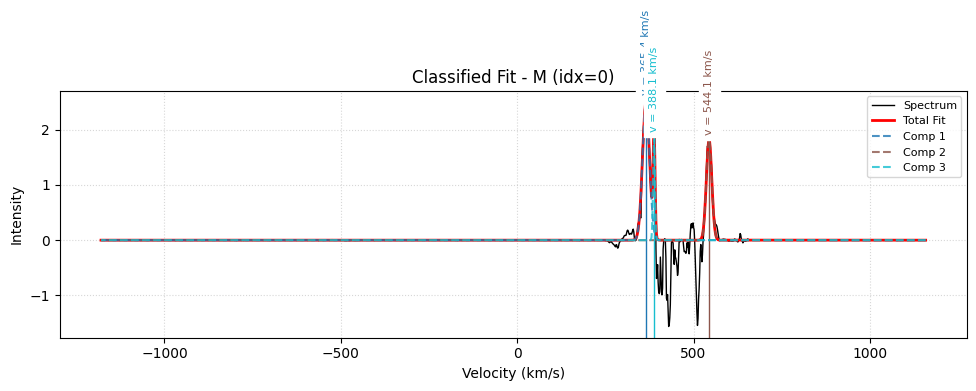

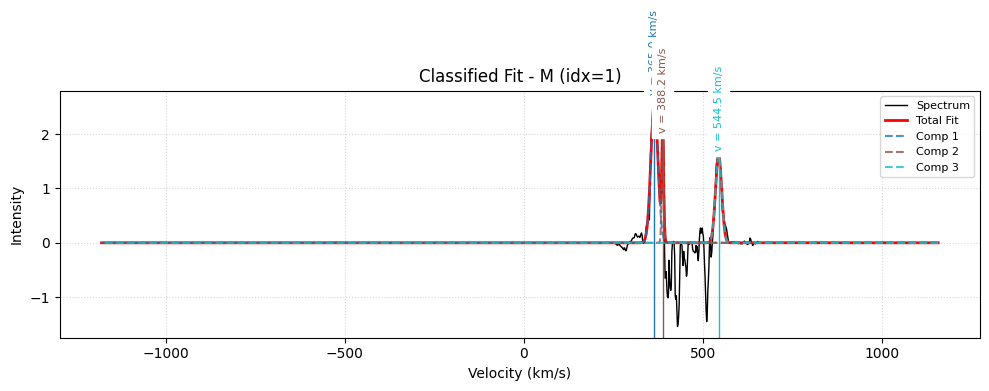

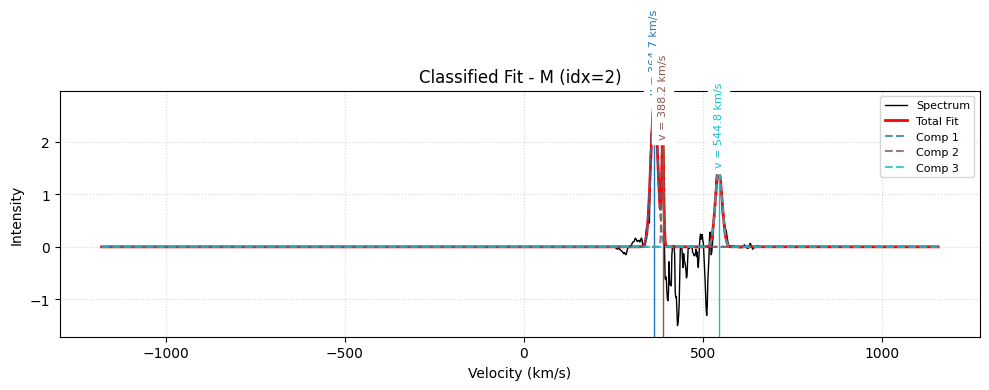

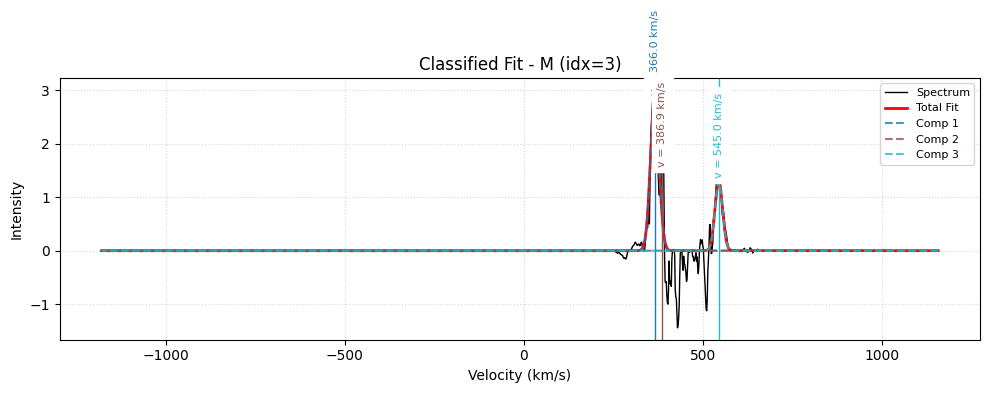

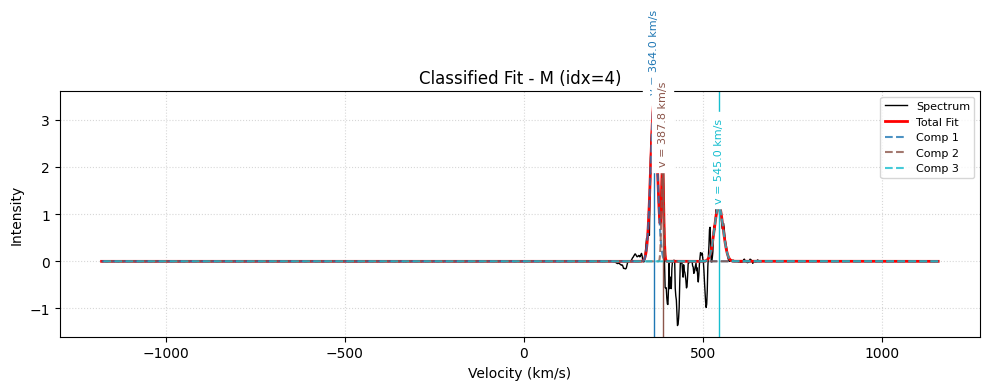

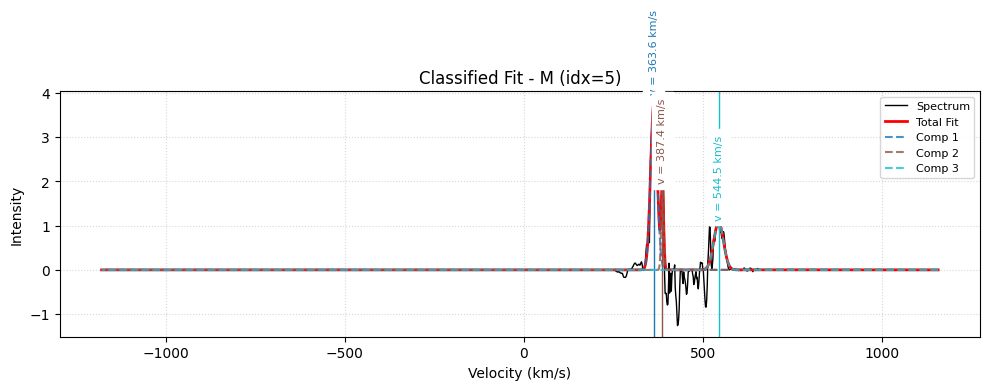

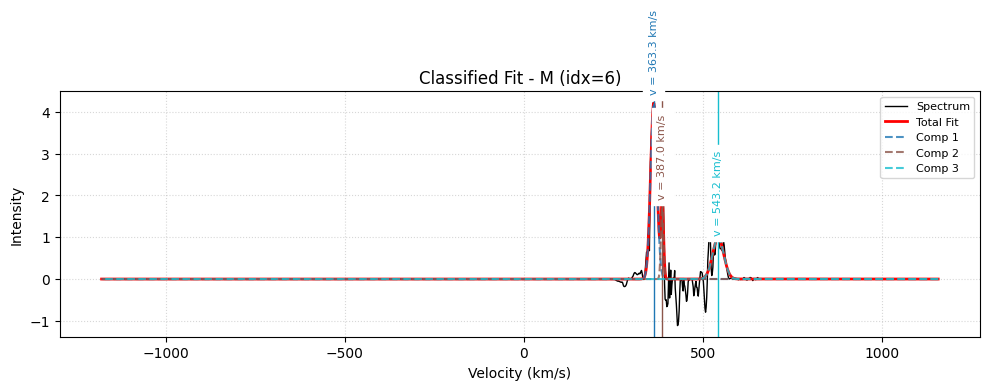

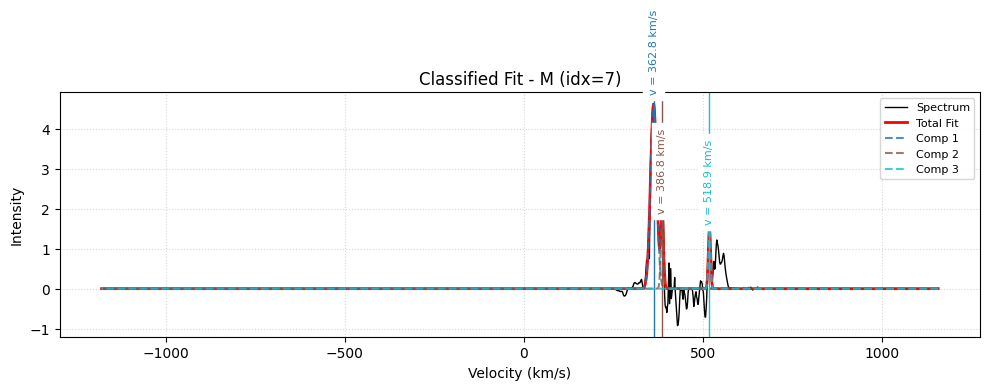

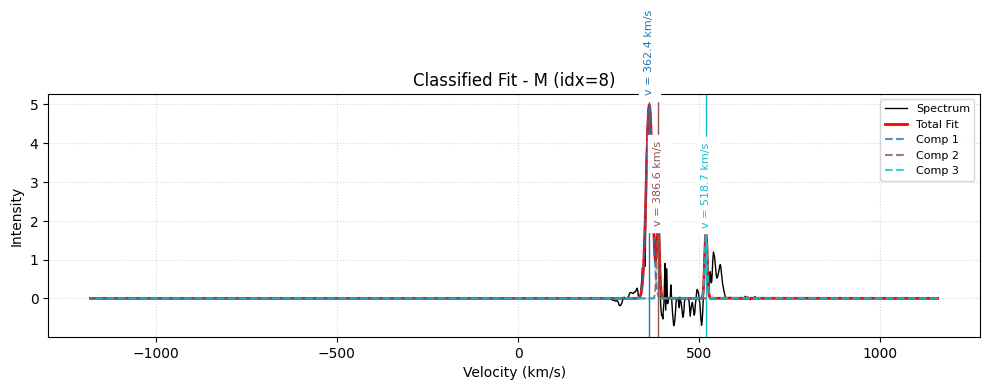

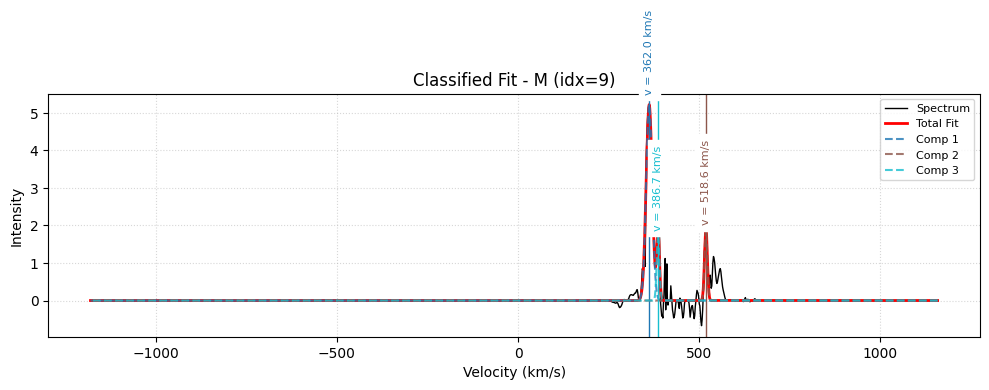

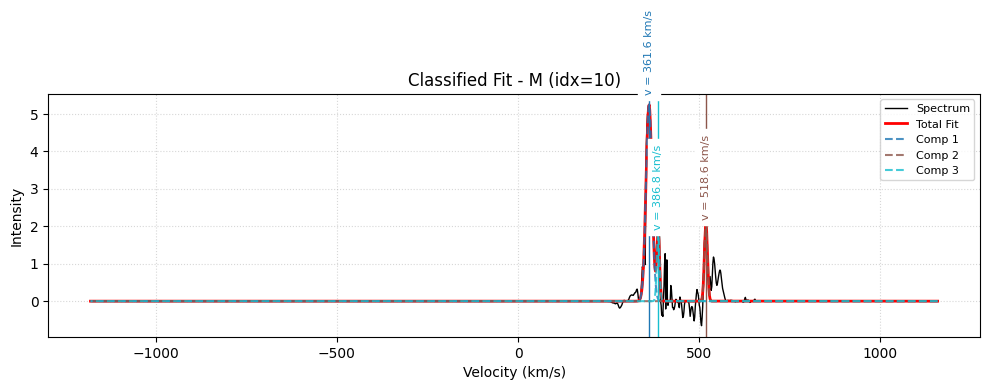

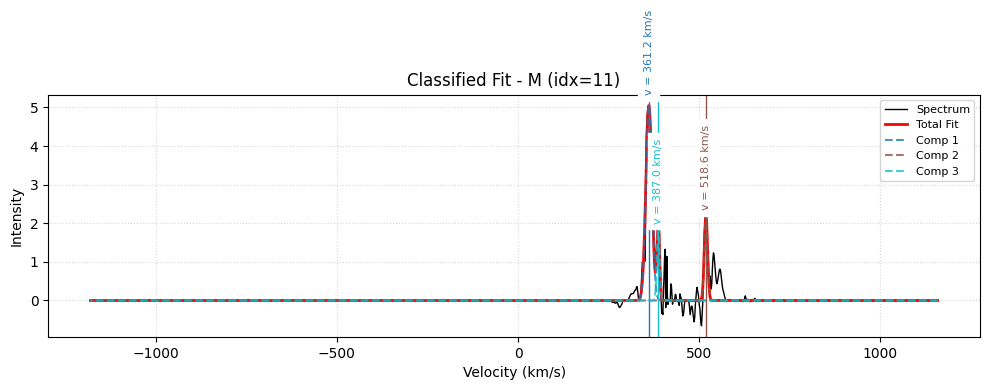

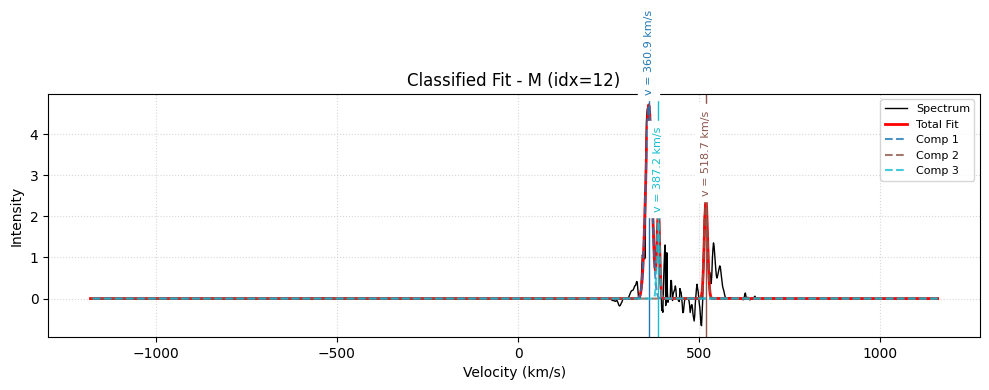

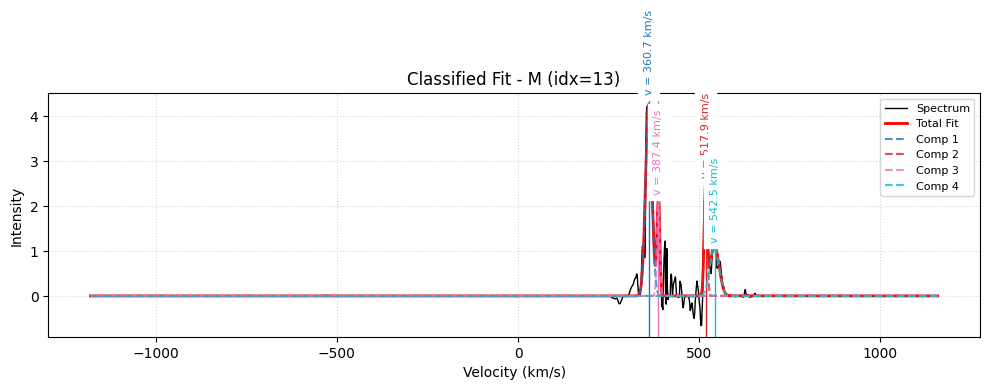

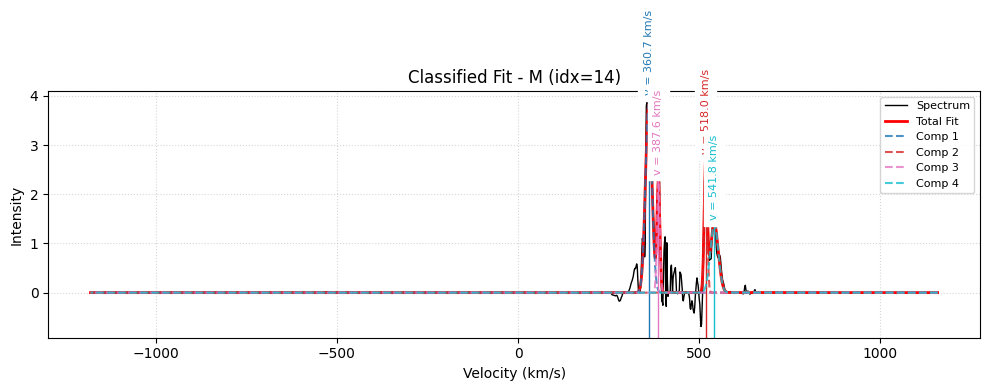

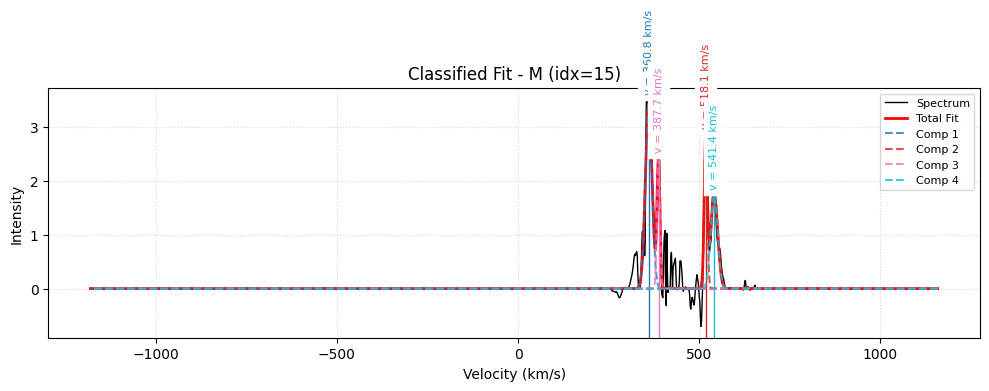

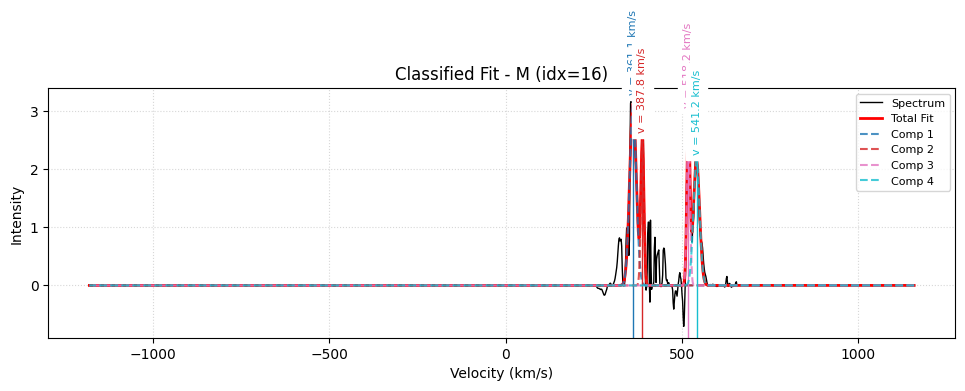

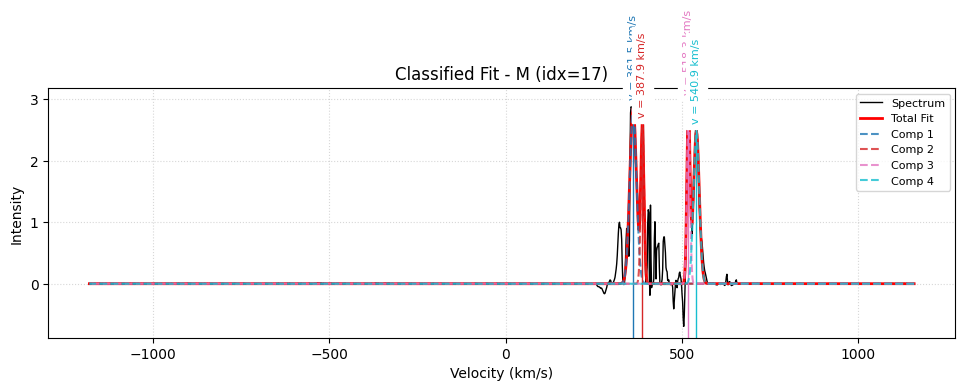

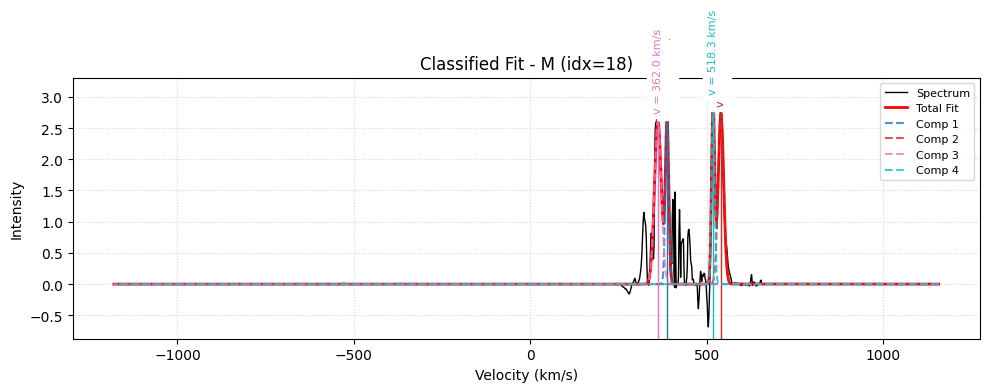

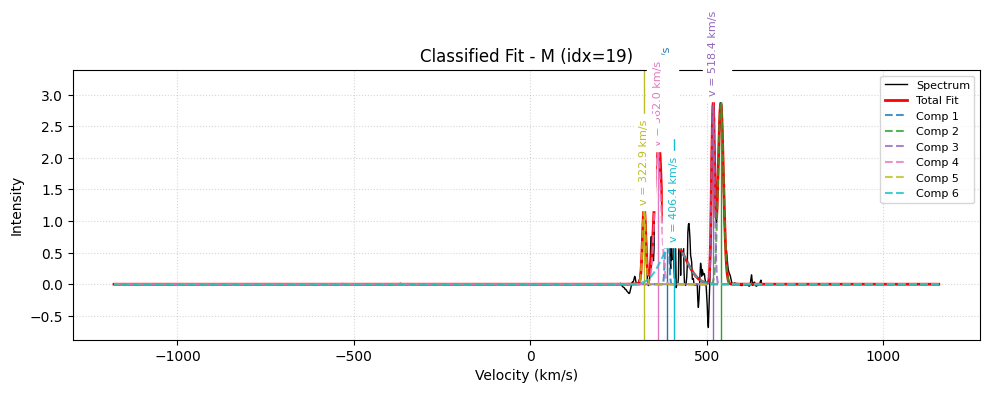

Plotted 20 spectra for category 'm'.


In [9]:
# Plot the results
# 單峰
# pipeline.plot_classified_fits(fit_result_pickle='fit_result_dic.pickle', category='s', plot_max=20)
# 多峰
pipeline.plot_classified_fits(fit_result_pickle='fit_result_dic.pickle', category='m', plot_max=20)


In [ ]:
# 疊加
v_rest, mean_rest, std_rest = pipeline.stack_restframe(plot=False)
v_raw, mean_raw, std_raw = pipeline.stack_raw_spectra(plot=False)

pipeline.plot_stacked_zoom(
    v_rest, mean_rest,
    v_raw, mean_raw,
    target_freq= 215.7,
    freq_raw0=215.220653, # SO 3Σ v = 0
    vmin=-1800, vmax=600
)

In [ ]:
v_grid, mean_spec, std_spec = pipeline.stack_restframe(plot=False)
# 常見分子線字典
line_dict = {
    "SO":           215.220653,
    "CH3NH2":       215.143053,
    "34SO":         215.8394361,
    "c-C3H2":       216.278756,
    "DCO+":         216.1125822
    }

# restfreq 設為你當時疊加主峰的分子線頻率（如 SO）
restfreq = 215.220653 # SO 3Σ v = 0

# 假設 pipeline 是你的 GausspyPipeline 實例
pipeline.plot_lines_on_stack(v_grid, mean_spec, line_dict, restfreq=restfreq, label_offset=0.02)
